In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import cv2 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

from pyriemann.clustering import Kmeans

In [4]:
data = pd.read_csv('tb2_data_clean_3.csv', sep=';')
data.head()

,MMSI,LAT,LON,TIMESTAMP
0,677054700,1.216667,103.618333,1621910431
1,677054700,1.216667,103.616667,1621909889
2,677054700,1.217755,103.618347,1621909243
3,677054700,1.217748,103.618327,1621908342
4,677028400,1.302933,103.616900,1621911351


In [5]:
data = data.iloc[:,1:3]
data

,LAT,LON
0,1.216667,103.618333
1,1.216667,103.616667
2,1.217755,103.618347
3,1.217748,103.618327
4,1.302933,103.616900
...,...,...
162200,1.305877,103.614833
162201,1.305882,103.614830
162202,2.202430,102.195437
162203,2.202423,102.195440


In [4]:
data.values

array([[  1.21666667, 103.6183333 ],
       [  1.21666667, 103.6166667 ],
       [  1.217755  , 103.6183467 ],
       ...,
       [  2.20243   , 102.1954367 ],
       [  2.20242333, 102.19544   ],
       [  2.20242667, 102.195435  ]])

In [8]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data.values)
    Sum_of_squared_distances.append(km.inertia_)

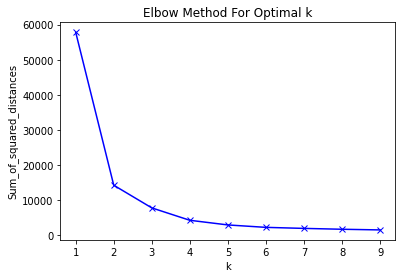

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
k_means = KMeans(n_clusters=2)
k_means.fit(data.values)
clusters = k_means.fit_predict(data.values)

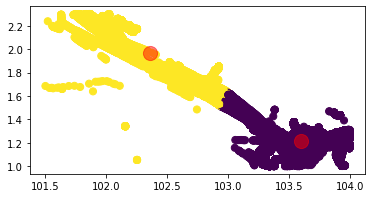

In [7]:
plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [8]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    return distances

distances = []
for i, (cx, cy) in enumerate(centers):
    print(i, cx, cy)
    mean_distance = k_mean_distance(data.values, cx, cy, i, clusters)
    distances.append(mean_distance)
    print(min(distances[i]))
    print(max(distances[i]))
    print('-----------------------------------')

0 1.2184239723075094 103.60063402658824
0.0004525549808169039
0.7294316636531146
-----------------------------------
1 1.9690394651396483 102.36203487546216
0.01572701103349039
0.9219404454753872
-----------------------------------


In [9]:
jarak = pd.DataFrame(distances[0])


# scaling data
mms = MinMaxScaler()
mms.fit(jarak)
print(mms.data_min_)
print(mms.data_max_)
jarak_scaled = mms.transform(jarak)
print(jarak_scaled.min())
print(jarak_scaled.max())

[0.00045255]
[0.72943166]
0.0
0.9999999999999999


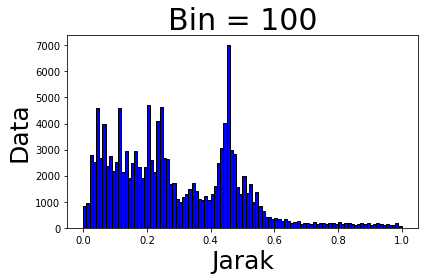

In [10]:
binwidth = 100

ax = plt.subplot(111)
ax.hist(jarak_scaled, bins = binwidth,
             color = 'blue', edgecolor = 'black')
ax.set_title('Bin = %d' % binwidth, size = 30)
ax.set_xlabel('Jarak', size = 25)
ax.set_ylabel('Data', size= 25)

plt.tight_layout()
plt.show()

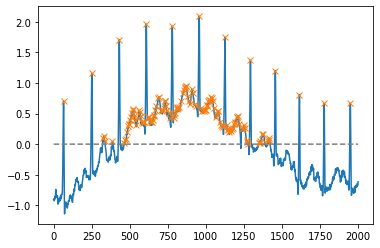

In [15]:
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

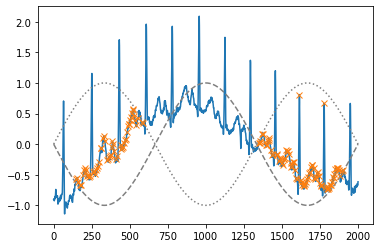

In [16]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()